# Homework 1

Aprendizagem 2023/2024 - LEIC @ IST 

Group #24
- Daniel Nunes (Nº 103095)
- Gonçalo Alves (Nº 103540)

## Data importing

In [176]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


## Exercise 1

To first use the `f_classif` function, we first have to state explicitly which variables are considered inputs and which one is the output variable.

After this, we can use the `f_classif` function to get the F1-score between each input variable and the output variable.

In [177]:
from sklearn.feature_selection import f_classif

df_inputs = df.drop('class', axis=1)
df_outputs = df['class']

In [178]:
f_values, p_values = f_classif(df_inputs, df_outputs)

# Display output in a table
fimportance_data = {
    'Variable': df.columns.values[:-1],
    'F1-score': f_values,
    'P-value': p_values
}
fimportance_df = pd.DataFrame(fimportance_data)
display(fimportance_df)

,Variable,F1-score,P-value
0,pelvic_incidence,98.539709,8.752849e-34
1,pelvic_tilt,21.299194,2.176879e-09
2,lumbar_lordosis_angle,114.982840,5.357329e-38
3,sacral_slope,89.643953,2.175670e-31
4,pelvic_radius,16.866935,1.121996e-07
5,degree_spondylolisthesis,119.122881,5.114732e-39


Since the F1-score is directly related to the discriminative power of a variable, then we can conclude that the `sacral_slope` has the lowest discriminative power, while `degree_spondylolisthesis` has the highest one.

Next, let's plot the class-conditional probability functions for these two variables.

In [187]:
most_discriminative = df.columns[np.argmax(f_values)]
least_discriminative = df.columns[np.argmin(f_values)]

most_discriminative_data = df_inputs[most_discriminative]
least_discriminative_data = df_inputs[least_discriminative]

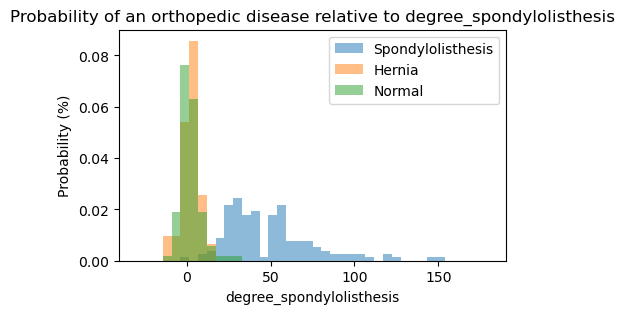

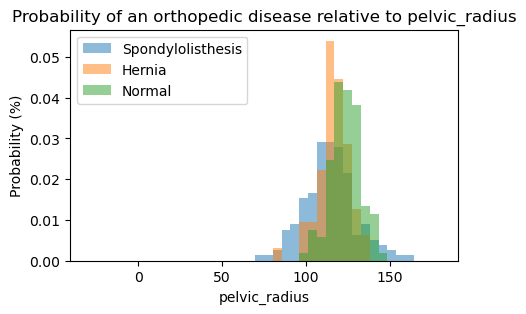

In [188]:
import matplotlib.pyplot as plt

df_discriminative = df.drop(["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "pelvic_radius"], axis=1);

plt.figure(figsize=(5,3))
for type in set(df['class']):
    plt.hist(most_discriminative_data[df['class'] == type], range=(-30, 180), bins=40, alpha=0.5, label=type, density=True)
plt.xlabel(most_discriminative)
plt.ylabel('Probability (%)')
plt.legend()
plt.title("Probability of an orthopedic disease relative to " + most_discriminative)
plt.show()

plt.figure(figsize=(5,3))
for type in set(df['class']):
    plt.hist(least_discriminative_data[df['class'] == type], range=(-30, 180), bins=40, alpha=0.5, label=type, density=True)
plt.xlabel(least_discriminative)
plt.ylabel('Probability (%)')
plt.legend()
plt.title("Probability of an orthopedic disease relative to " + least_discriminative)
plt.show()